In [2]:
import configparser
import pymysql
import json

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib


c:\Users\USER\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
def create_connection():
    with open('../db_conexion/db_settings.json', 'r') as f:
        config = json.load(f)

    try:
        connection = pymysql.connect(
            host=config['host'],
            user=config['user'],
            password=config['password'],
            database=config['database'],
            port=int(config['port'])
        )
        cursor = connection.cursor()
        print("Successful Connection")
        cursor.close()
        return connection
    except pymysql.Error as e:
        print("Connection Error:", e)
        return None


def use_db():
    connection = create_connection()
    if connection:
        cursor = connection.cursor()
        cursor.execute("SELECT * FROM googleplaystore")
        rows = cursor.fetchall()
        columns = [col[0] for col in cursor.description]
        df = pd.DataFrame(rows, columns=columns)
        cursor.close()
        connection.close()
        return df

In [4]:
df = use_db()
df.head()

Successful Connection


,id,app_name,category,installs,size,minimum_android,released,last_updated,content_rating,rating,minimum_installs,maximum_installs
0,1,Gakondo,Adventure,10,10M,7.1 and up,2020-02-26,2020-02-26,Everyone,0.0,10,15
1,2,Vibook,Productivity,50,3.7M,4.0.3 and up,2019-08-09,2019-08-19,Everyone,0.0,50,58
2,3,IMOCCI,Social,50,46M,6.0 and up,2018-12-24,2019-12-20,Teen,0.0,50,89
3,4,WhatsOpen,Communication,10,1.3M,4.4 and up,2020-06-16,2018-12-07,Teen,0.0,10,18
4,5,Parents,Maps & Navigation,100,2.7M,4.0 and up,2018-01-10,2018-06-27,Everyone,0.0,100,330


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208956 entries, 0 to 208955
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                208956 non-null  int64         
 1   app_name          208956 non-null  object        
 2   category          208956 non-null  object        
 3   installs          208956 non-null  object        
 4   size              208956 non-null  object        
 5   minimum_android   208956 non-null  object        
 6   released          208956 non-null  datetime64[ns]
 7   last_updated      208956 non-null  object        
 8   content_rating    208956 non-null  object        
 9   rating            208956 non-null  float64       
 10  minimum_installs  208956 non-null  int64         
 11  maximum_installs  208956 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 19.1+ MB


In [6]:
df.dropna(inplace=True)

In [8]:
df.to_csv('../data/Google-Playstore-New.csv', index=False, encoding='utf-8')

Matrix de Correlation

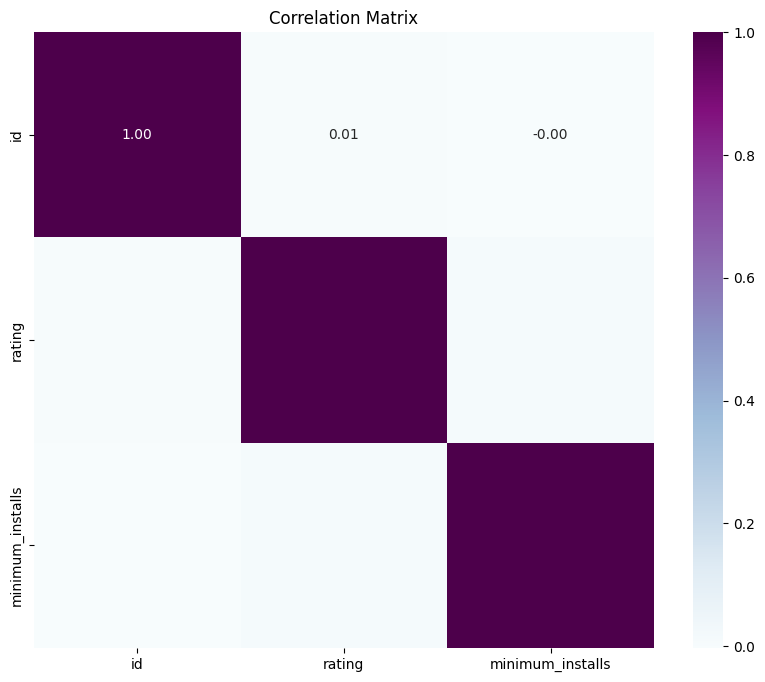

In [8]:
new_df = df.select_dtypes(include=[np.number])
correlation_matrix = new_df.corr()
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='BuPu')
plt.show()

In [9]:
colum_drop = ['id']
new_df.drop(columns=colum_drop, inplace=True)

In [10]:
new_df.head()

,rating,minimum_installs
0,0.0,10
1,0.0,50
2,0.0,50
3,0.0,10
4,0.0,100


In [11]:
X = new_df.drop('rating',axis= 1) 
y = new_df['rating'] 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=20)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((146269, 1), (62687, 1), (146269,), (62687,))

In [12]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [13]:
m_file = "../Model/RFR_Model.pkl"
joblib.dump(model, m_file)

['../Model/RFR_Model.pkl']